In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from collections import defaultdict


In [6]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

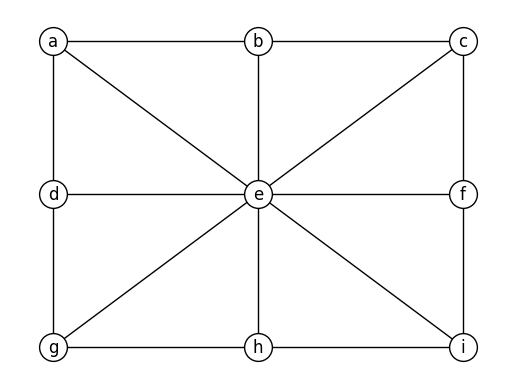

Backtracking for Hamiltonian cycle

**procedure** backtrack(P, c) is    
&nbsp;&nbsp; if reject(P, c) **then** return    
&nbsp;&nbsp; if accept(P, c) **then** output(P,c)    
&nbsp;&nbsp; s <- first(P,c)    
&nbsp;&nbsp; **while** s != NULL **do**   
&nbsp;&nbsp;&nbsp;&nbsp; backtrack(P, s)
&nbsp;&nbsp;&nbsp;&nbsp; s <- next(P, s)


In [ ]:
def backtrack_hamiltonian_paths(
  graph, current_node, visited, current_path, total_nodes, all_paths):
  """  
  Recursive backtracking function to find all Hamiltonian paths.
  """
  visited.add(current_node)
  current_path.append(current_node)

  # -- Base case: all nodes visited
  if len(current_path) == total_nodes:
    all_paths.append(current_path.copy())
  else:
    # -- Explore unvisited neighbors
    for neighbor in graph[current_node]:
      if neighbor not in visited:
        backtrack_hamiltonian_paths(
          graph, neighbor, visited, current_path, total_nodes, all_paths)
  
  # -- Backtrack
  current_path.pop()
  visited.remove(current_node)

In [30]:
def find_all_hamiltonian_path_from_a(edges):
  """
  Given a list of undirected edges (no duplicates), find all 
  Hamiltonian paths starting from node 'a'
  """
  
  # -- Build graph and collect nodes
  graph = defaultdict(list)
  nodes = set()

  for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)
    nodes.add(u)
    nodes.add(v)

  if 'a' not in nodes:
    return []

  total_nodes = len(nodes)
  visited = set()
  current_path = []
  all_paths = []

  # -- Start backtracking from 'a'
  backtrack_hamiltonian_paths(
    graph, 'a', visited, current_path, total_nodes, all_paths)

  return all_paths

Graph $G_1$

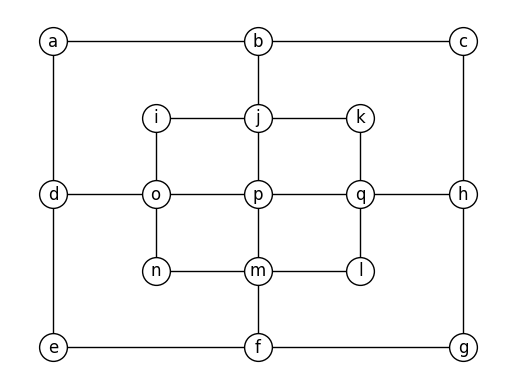

In [56]:
G1_edges = np.array([
  ["a", "b"], ["a", "d"],
  ["b", "c"], ["b", "j"],
  ["c", "h"],
  ["d", "o"], ["d", "e"],
  ["e", "f"],
  ["f", "m"], ["f", "g"],
  ["g", "h"],
  ["h", "q"],
  ["i", "j"], ["i", "o"],
  ["j", "p"], ["j", "k"],
  ["k", "q"],
  ["l", "q"], ["l", "m"],
  ["m", "n"], ["m", "p"],
  ["n", "o"],
  ["o", "p"],
  ["p", "q"]])

G1 = nx.Graph()

for edge in G1_edges:
  G1.add_nodes_from(edge)
  G1.add_edge(*edge)

fig, ax = plt.subplots()

pos = {"a": (-2, 2), "b": (0, 2), "c": (2, 2),
       "d": (-2, 0), "e": (-2, -2), "f": (0, -2), 
       "g": (2, -2), "h": (2, 0), "i": (-1, 1), 
       "j": (0, 1), "k": (1, 1), "l": (1, -1), 
       "m": (0, -1), "n": (-1, -1), "o": (-1, 0),
       "p": (0, 0), "q": (1, 0)}
nx.draw(G1, ax=ax, with_labels=True, node_size=400, node_color="w", 
        edgecolors="k", pos=pos)

plt.show(fig)

In [57]:
all_hamiltonian_paths_G1 = find_all_hamiltonian_path_from_a(G1_edges)
all_hamiltonian_paths_G1

[]

In [58]:
def backtrack(graph, current, visited, path, all_paths):
  """
  Recursive backtracking function to explore all simple apths from 'current'.
  - graph: adjancency list (dict)
  - current: current node
  - visited: set of visited nodes (to avoid cycles)
  - path: current path as a list
  - all_paths: accumulator for completed paths
  """
  visited.add(current)
  path.append(current)

  # -- Check for unvisited neighbors
  has_unvisited = any(neighbor not in visited for neighbor in graph[current])

  if not has_unvisited:
    # -- Dead end: save a copy of this complete path
    all_paths.append(path.copy())
  else:
    # -- Continue exploring each unvisited neighbor
    for neighbor in graph[current]:
      if neighbor not in visited:
        backtrack(graph, neighbor, visited, path, all_paths)

  # -- Backtrack
  path.pop()
  visited.remove(current)

In [60]:
def find_all_paths_from_a(edges):
  """
  Returns all maximal simple paths starting from node 'a' given a list of 
  undirected edges (no duplicates)
  """
  # -- Build undirected graph as adjacency list
  graph = defaultdict(list)
  for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)

  all_paths = []
  start_node = 'a'

  # -- Ensure 'a' exists in the graph
  if start_node not in graph:
    return []

  backtrack(graph, start_node, set(), [], all_paths)
  return all_paths

In [64]:
len(G1.nodes())

17

In [70]:
all_paths_G1 = find_all_paths_from_a(G1_edges)

print(len(all_paths_G1))
shortest_path_length = len(G1.nodes)
for path in all_paths_G1:
  current_path_length = len(path)
  if current_path_length < shortest_path_length:
    shortest_path_length = current_path_length
  print(path)

print(shortest_path_length)

for path in all_paths_G1:
  if len(path) == shortest_path_length:
    print(path)

468
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'p', 'm', 'l', 'q', 'k']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'p', 'm', 'n']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'p', 'q', 'k']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'p', 'q', 'l', 'm', 'n']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'k', 'q', 'l', 'm', 'n']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'k', 'q', 'l', 'm', 'p']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'k', 'q', 'p', 'm', 'l']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'i', 'j', 'k', 'q', 'p', 'm', 'n']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'n', 'm', 'l', 'q', 'k', 'j', 'i']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'n', 'm', 'l', 'q', 'k', 'j', 'p']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'n', 'm', 'l', 'q', 'p', 'j', 'i']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o', 'n', 'm', 'l', 'q', 'p', 'j', 'k']
['a', 'b', 'c', 'h', 'g', 'f', 'e', 'd', 'o'

Graph $G_3$

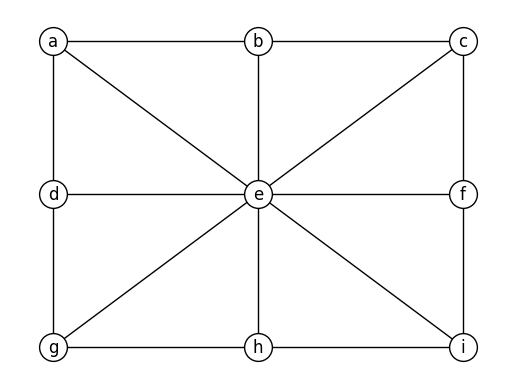

In [53]:
edges = np.array([
["a", "b"], ["a", "d"], ["a", "e"],
["b", "c"], ["b", "e"],
["c", "e"], ["c", "f"],
["d", "e"], ["d", "g"],
["e", "f"], ["e", "g"], ["e", "h"], ["e", "i"],
["f", "i"],
["g", "h"],
["h", "i"] ])

G3 = nx.Graph()

for edge in edges:
  G3.add_nodes_from(edge)
  G3.add_edge(*edge)

fig, ax = plt.subplots()

pos = {"a": (-2, 1), "b": (0, 1), "c": (2, 1),
       "d": (-2, 0), "e": (0, 0), "f": (2, 0), 
       "g": (-2, -1), "h": (0, -1), "i": (2, -1)}
nx.draw(G3, ax=ax, with_labels=True, node_size=400, node_color="w", 
        edgecolors="k", pos=pos)

plt.show(fig)

In [32]:
all_hamiltonian_paths = find_all_hamiltonian_path_from_a(edges)
all_hamiltonian_paths

[['a', 'b', 'c', 'e', 'd', 'g', 'h', 'i', 'f'],
 ['a', 'b', 'c', 'e', 'f', 'i', 'h', 'g', 'd'],
 ['a', 'b', 'c', 'f', 'e', 'd', 'g', 'h', 'i'],
 ['a', 'b', 'c', 'f', 'e', 'i', 'h', 'g', 'd'],
 ['a', 'b', 'c', 'f', 'i', 'e', 'd', 'g', 'h'],
 ['a', 'b', 'c', 'f', 'i', 'e', 'h', 'g', 'd'],
 ['a', 'b', 'c', 'f', 'i', 'h', 'e', 'd', 'g'],
 ['a', 'b', 'c', 'f', 'i', 'h', 'e', 'g', 'd'],
 ['a', 'b', 'c', 'f', 'i', 'h', 'g', 'd', 'e'],
 ['a', 'b', 'c', 'f', 'i', 'h', 'g', 'e', 'd'],
 ['a', 'b', 'e', 'c', 'f', 'i', 'h', 'g', 'd'],
 ['a', 'b', 'e', 'd', 'g', 'h', 'i', 'f', 'c'],
 ['a', 'd', 'e', 'b', 'c', 'f', 'i', 'h', 'g'],
 ['a', 'd', 'e', 'g', 'h', 'i', 'f', 'c', 'b'],
 ['a', 'd', 'g', 'e', 'b', 'c', 'f', 'i', 'h'],
 ['a', 'd', 'g', 'e', 'h', 'i', 'f', 'c', 'b'],
 ['a', 'd', 'g', 'h', 'e', 'b', 'c', 'f', 'i'],
 ['a', 'd', 'g', 'h', 'e', 'i', 'f', 'c', 'b'],
 ['a', 'd', 'g', 'h', 'i', 'e', 'b', 'c', 'f'],
 ['a', 'd', 'g', 'h', 'i', 'e', 'f', 'c', 'b'],
 ['a', 'd', 'g', 'h', 'i', 'f', 'c', 'b'

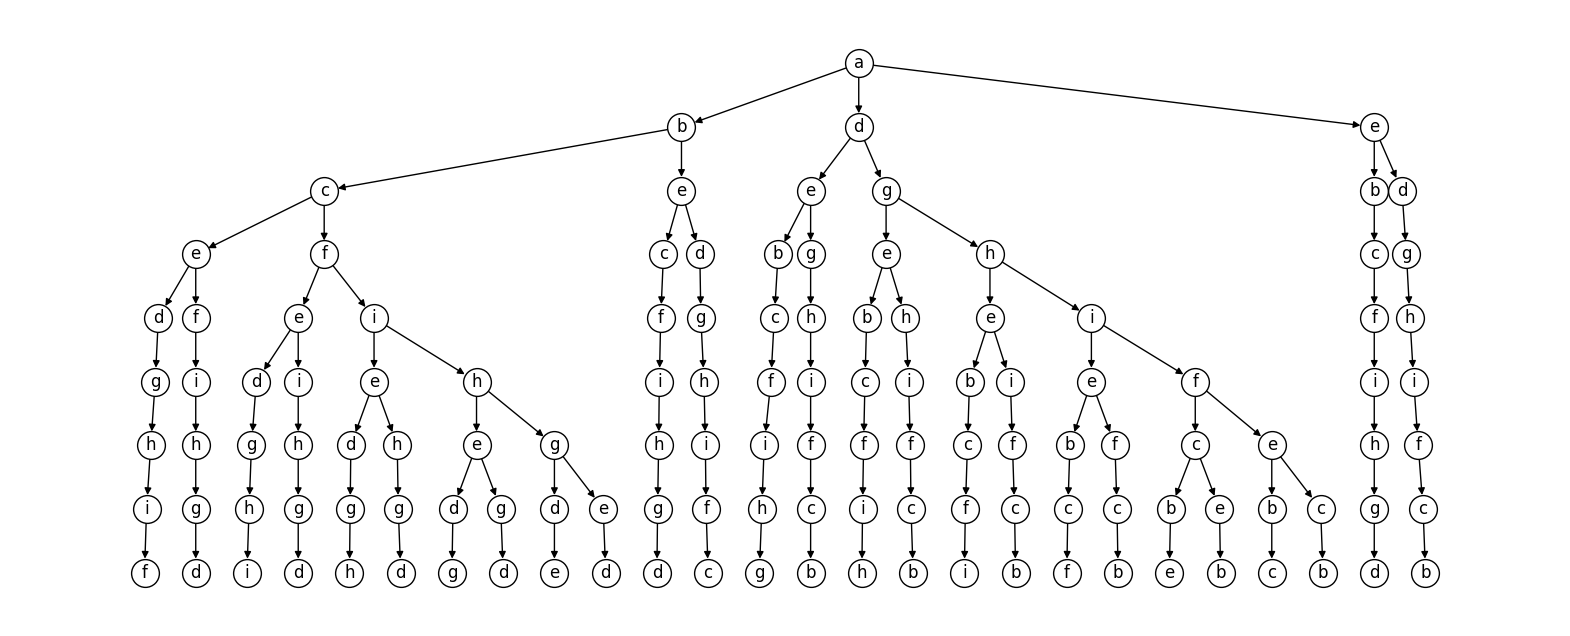

In [52]:
tree_G3_a = nx.DiGraph()

for path in all_hamiltonian_paths:
  for i in range(len(path) - 1):
    # -- Create hierarchical node IDs: 'a', 'a/b', 'a/b/c', ...
    node_ids = []
    for i, node in enumerate(path):
      if i == 0:
        node_id = node
      else:
        node_id = node_ids[-1] + "/" + node
      node_ids.append(node_id)

    # -- Add edges between consecutive hierarchical IDs
    for i in range(len(node_ids) - 1):
      tree_G3_a.add_edge(node_ids[i], node_ids[i+1])

fig, ax = plt.subplots(figsize=(20,8))

# -- fix labeling
labels = {node: node.split("/")[-1] for node in tree_G3_a.nodes()}

pos = nx.drawing.nx_agraph.graphviz_layout(tree_G3_a, prog='dot', 
  args="-Grankdir-TB")
nx.draw(tree_G3_a, ax=ax, pos=pos, labels=labels, node_size=400, 
          node_color="w", edgecolors="k")

plt.show(fig)